In [49]:
import numpy as np 
import matplotlib.pyplot as plt
from scipy.integrate import complex_ode
from scipy.integrate import ode
from scipy.integrate import odeint
from scipy.linalg import circulant
mode_index = np.arange(-40,41,1,int)
simulation_time = np.arange(0,16,1,int)

# 1. one resonator unit

From the paper, we know that the dynamic equation a resonator can be described by 
\begin{equation}
\frac{da}{dt}= (i\omega _0 - \frac{1}{\tau})a+k \cdot S^{in}
\end{equation}
, where $a$ and $|a|^2$ are resonance field and energe. $\omega_0$ is resonance frequency. $\frac{1}{\tau}$ is total decay rate. k is coupling coefficient. For a continuous-time dynamic system, the impulse is modeled as the Dirac delta function $S^{in}(t) = \delta (t-t_0)$.


Now, we know the impulse response (resonance amplitude $|a|$) of a resonator is: 
\begin{equation}
R(t) = |a| =k \cdot e^{-\frac{1}{\tau}(t-t_0 )}
\end{equation}

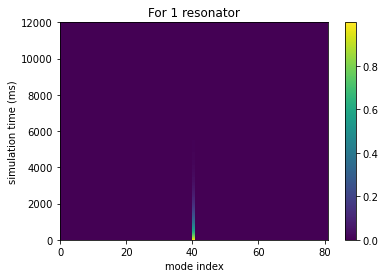

In [50]:
temp = np.zeros(81)
temp[1] = temp[80] =1.7
J = circulant(temp)

w = 0.1
tao = 1
k=1
S_in = 1
i_ind = np.zeros(81)
for i in range (i_ind.size):
    i_ind[i] = i-40

    
def lle_dis_cou (t,a):
    #da = np.array([complex(0, 0) for i in range(81)])
    da = (1j * w - tao ) * a
    return da

#a_initial = np.zeros(81)

a_initial = np.array([complex(0, 0) for i in range(81)])
a_initial[40] +=1 
t = np.linspace(0, 11, 1000)

r = complex_ode(lle_dis_cou)
r.set_initial_value(a_initial, 0)

t1 = 12
dt=0.001

tt = []
aaa = []

while r.successful() and r.t < t1:
    x = r.t+dt
    y = r.integrate(x)
    aaa.append (y)
    tt.append (x)

aaa_amp = np.zeros((len(aaa),len(aaa[0])))
for i in range (len(aaa)):
    for j in range (len(aaa[0])):
        aaa_amp[i][j] = abs(aaa[i][j])
p1 = plt.pcolormesh(aaa_amp)
plt.colorbar(p1)
plt.title('For 1 resonator')
plt.xlabel('mode index')
plt.ylabel('simulation time (ms)')
plt.show()

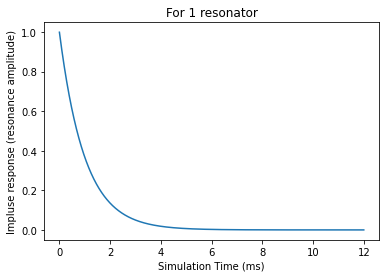

In [51]:
plt.plot (tt, aaa_amp[:,40])
plt.title('For 1 resonator')
plt.xlabel('Simulation Time (ms)')
plt.ylabel('Impluse response (resonance amplitude)')
plt.show()

We can tell that the simulation of the dynamic equation is compatible with the impulse response equation proposed in the paper. It obeys exponential decay for both linear and non-linear resonance system.

# 2. Coupled resonators system

Now, for many resonators coupled together, we can define it as a scalable RNN system by the following equations
\begin{equation}
\frac{da}{dt}= (i\Omega - \Gamma_e - H_{int})a+K^T \cdot S_t
\end{equation}
, where the diagonal matrices $\Omega$ is resonance frequency, diagonal matrice $\Gamma_e$ is the decay rate into channels, and $H_{int}$ is the coupling bewteen resonators. Moreover, $K$ represents the coupling between resonators and ports. $S_t$ is a continuous input sequence. 

Importantly, we know that $H_{int} = \frac{K^{+} K}{2} - \Gamma_e$, and $K$ is defined by:
\begin{pmatrix}
k_1 exp(+i\beta_1 l_1) & ... & k_n exp(+i\beta_n l_n) &0 & ... &0 \\
k_1 exp(+i\beta_1 l_1) & ... & k_n exp(+i\beta_n l_n) &k_{n+1} exp(-i\beta_{n+1} l_{n+1}) & ... &k_{2n} exp(-i\beta_{2n} l_{2n}) \\
0 & ... & 0 &k_{n+1} exp(+i\beta_{n+1} l_{n+1}) & ... &k_{2n} exp(+i\beta_{2n} l_{2n})
\end{pmatrix}

80


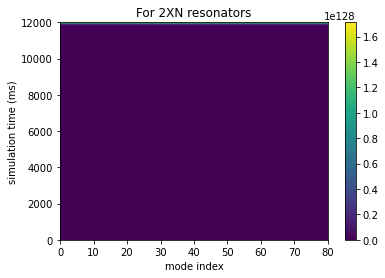

[[5.08370441e-004 5.08370441e-004 5.08370441e-004 ... 4.16324375e-004
  4.16324375e-004 4.16324375e-004]
 [1.03367193e-003 1.03367193e-003 1.03367193e-003 ... 8.32934095e-004
  8.32934095e-004 8.32934095e-004]
 [1.57619001e-003 1.57619001e-003 1.57619001e-003 ... 1.24972829e-003
  1.24972829e-003 1.24972829e-003]
 ...
 [1.62868174e+128 1.62868174e+128 1.62868174e+128 ... 1.62868174e+128
  1.62868174e+128 1.62868174e+128]
 [1.66985993e+128 1.66985993e+128 1.66985993e+128 ... 1.66985993e+128
  1.66985993e+128 1.66985993e+128]
 [1.71207923e+128 1.71207923e+128 1.71207923e+128 ... 1.71207923e+128
  1.71207923e+128 1.71207923e+128]]


In [65]:
temp = np.zeros(80)
temp[0]  =1
Omega = circulant(temp)

temp = np.zeros(80)
temp[0]  =1
Gamma = circulant(temp)

k = np.array([complex(1, 0) for i in range(80)])
beta = np.array([complex(1, 0) for i in range(80)])
l = np.array([complex(1, 0) for i in range(80)])

temp1 = np.array([complex(0, 0) for i in range(240)])
for i in range(240):
    if (i< 40):
        temp1[i] = k[i] * np.exp(complex(0, 1) *beta[i]*l[i])
    if (80<=i<160):
        temp1[i] = k[i-80] * np.exp(-complex(0, 1)*beta[i-80]*l[i-80])
    if (200<=i <240):
        temp1[i] = k[i-160] * np.exp(complex(0, 1)*beta[i-160]*l[i-160])
K = temp1.reshape(3,80)

H_int = 0.5* K.transpose() @ K - Gamma
print (H_int[:,0].size)

w = 0.1
tao = 1
k=1
S_in = 1

    
def lle_dis_cou (t,a):
    #da = np.array([complex(0, 0) for i in range(81)])
    da = (1j * Omega - Gamma - H_int ) @ a
    return da



a_initial = np.array([complex(0, 0) for i in range(80)])
a_initial[40] +=1 
t = np.linspace(0, 11, 1000)

r = complex_ode(lle_dis_cou)
r.set_initial_value(a_initial, 0)

t1 = 12
dt=0.001

tt = []
aaa = []

while r.successful() and r.t < t1:
    x = r.t+dt
    y = r.integrate(x)
    aaa.append (y)
    tt.append (x)

aaa_amp = np.zeros((len(aaa),len(aaa[0])))
for i in range (len(aaa)):
    for j in range (len(aaa[0])):
        aaa_amp[i][j] = abs(aaa[i][j])
p1 = plt.pcolormesh(aaa_amp)
plt.colorbar(p1)
plt.title('For 2XN resonators')
plt.xlabel('mode index')
plt.ylabel('simulation time (ms)')
plt.show()
print (aaa_amp)